# League Table

We will create league table from the all individual matches data in a season

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#This next line makes our charts show up in the notebook
%matplotlib inline

df = pd.read_csv("season-1213.csv")
df.head()

,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,...,BbAv<2.5,BbAH,BbAHh,BbMxAHH,BbAvAHH,BbMxAHA,BbAvAHA,PSCH,PSCD,PSCA
0,E0,18/08/12,Arsenal,Sunderland,0,0,D,0,0,D,...,2.05,23,-1.25,2.02,1.96,1.96,1.91,1.44,4.72,8.71
1,E0,18/08/12,Fulham,Norwich,5,0,H,2,0,H,...,1.92,21,-0.50,1.83,1.80,2.14,2.09,1.84,3.75,4.75
2,E0,18/08/12,Newcastle,Tottenham,2,1,H,0,0,D,...,1.92,23,0.00,1.93,1.88,2.03,1.97,2.83,3.35,2.72
3,E0,18/08/12,QPR,Swansea,0,5,A,0,1,A,...,1.73,22,-0.25,1.80,1.75,2.21,2.13,2.00,3.53,4.15
4,E0,18/08/12,Reading,Stoke,1,1,D,0,1,A,...,1.67,24,-0.25,2.07,2.01,1.91,1.86,2.47,3.30,3.22


In [2]:
droplist = list(df.columns)
droplist = droplist[droplist.index('HTHG'):]
df.drop(droplist, axis = 1, inplace = True)
df.drop(['Div','Date'],axis=1,inplace=True)

df.head()

,HomeTeam,AwayTeam,FTHG,FTAG,FTR
0,Arsenal,Sunderland,0,0,D
1,Fulham,Norwich,5,0,H
2,Newcastle,Tottenham,2,1,H
3,QPR,Swansea,0,5,A
4,Reading,Stoke,1,1,D


In [3]:
#Wins
#Home Team
df['HW'] = np.where(df['FTR']=='H', 1, 0)
df['HD'] = np.where(df['FTR']=='D', 1, 0)
df['HL'] = np.where(df['FTR']=='A', 1, 0)
#Away Team
df['AW'] = np.where(df['FTR']=='A', 1, 0)
df['AD'] = np.where(df['FTR']=='D', 1, 0)
df['AL'] = np.where(df['FTR']=='H', 1, 0)

#Points
conditions = [df['FTR']=='H',df['FTR']=='D']
home_points = [3,1]
away_points = [0,1]
df['HP'] = np.select(conditions, home_points, default=0) #Home Points
df['AP'] = np.select(conditions, away_points, default=3) #Away Points
#There's more effective way to add points by using formula later after the table has been grouped by teams,
#but for educational reason, we use that way to demonstrate how to add conditional columns with more than 2 choices

#Show Data
df.head()

,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HW,HD,HL,AW,AD,AL,HP,AP
0,Arsenal,Sunderland,0,0,D,0,1,0,0,1,0,1,1
1,Fulham,Norwich,5,0,H,1,0,0,0,0,1,3,0
2,Newcastle,Tottenham,2,1,H,1,0,0,0,0,1,3,0
3,QPR,Swansea,0,5,A,0,0,1,1,0,0,0,3
4,Reading,Stoke,1,1,D,0,1,0,0,1,0,1,1


In [4]:
df_home = df.groupby('HomeTeam').sum()
#HomeGamesPlayed
df_home['HGP'] = df_home['HW'] + df_home['HD'] + df_home['HL']

#Renaming goals scored and against
df_home = df_home.rename(columns = {'FTHG':'HGS'})
df_home = df_home.rename(columns = {'FTAG':'HGA'})
#HomeGoalDifference
df_home['HGD'] = df_home['HGS'] - df_home['HGA']
df_home[['HGP','HP','HW','HD','HL','HGS','HGA','HGD']].sort_values(by=['HP'],ascending=False)

,HGP,HP,HW,HD,HL,HGS,HGA,HGD
HomeTeam,,,,,,,,
Man United,19,48,16,0,3,45,19,26
Man City,19,45,14,3,2,41,15,26
Everton,19,42,12,6,1,33,17,16
Chelsea,19,41,12,5,2,41,16,25
Arsenal,19,38,11,5,3,47,23,24
Tottenham,19,38,11,5,3,29,18,11
West Ham,19,33,9,6,4,34,22,12
Liverpool,19,33,9,6,4,33,16,17
Norwich,19,31,8,7,4,25,20,5


Above is the league table for home games

In [5]:
df_away = df.groupby('AwayTeam').sum()
#HomeGamesPlayed
df_away['AGP'] = df_away['AW'] + df_away['AD'] + df_away['AL']

#Renaming goals scored and against
df_away=df_away.rename(columns = {'FTHG':'AGA'})
df_away=df_away.rename(columns = {'FTAG':'AGS'})
#HomeGoalDifference
df_away['AGD'] = df_away['AGS'] - df_away['AGA']
df_away.drop(columns = ['HW','HD','HL','HP'], inplace=True)
df_away[['AGP','AP','AW','AD','AL','AGS','AGA','AGD']].sort_values(by=['AP'],ascending=False)

,AGP,AP,AW,AD,AL,AGS,AGA,AGD
AwayTeam,,,,,,,,
Man United,19,41,12,5,2,41,24,17
Arsenal,19,35,10,5,4,25,14,11
Chelsea,19,34,10,4,5,34,23,11
Tottenham,19,34,10,4,5,37,28,9
Man City,19,33,9,6,4,25,19,6
Liverpool,19,28,7,7,5,38,27,11
Everton,19,21,4,9,6,22,23,-1
Aston Villa,19,21,5,6,8,24,41,-17
Swansea,19,20,5,5,9,19,25,-6


Above is the league table for away games

In [6]:
#Create the league table
league_table=df_home[[]]
league_table['GP']=df_home['HGP']+df_away['AGP']
league_table['Points']=df_home['HP']+df_away['AP']
league_table['W']=df_home['HW']+df_away['AW']
league_table['D']=df_home['HD']+df_away['AD']
league_table['L']=df_home['HL']+df_away['AL']
league_table['GS']=df_home['HGS']+df_away['AGS']
league_table['GA']=df_home['HGA']+df_away['AGA']
league_table['GD']=df_home['HGD']+df_away['AGD']
league_table.sort_values(by=['Points'],ascending=False,inplace=True)
league_table

C:\Users\Thyo\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Thyo\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\Thyo\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using

,GP,Points,W,D,L,GS,GA,GD
HomeTeam,,,,,,,,
Man United,38,89,28,5,5,86,43,43
Man City,38,78,23,9,6,66,34,32
Chelsea,38,75,22,9,7,75,39,36
Arsenal,38,73,21,10,7,72,37,35
Tottenham,38,72,21,9,8,66,46,20
Everton,38,63,16,15,7,55,40,15
Liverpool,38,61,16,13,9,71,43,28
West Brom,38,49,14,7,17,53,57,-4
West Ham,38,46,12,10,16,45,53,-8


The error message shouldn't appear though.

We have created the league table. Now we want to see every team's position at the end of table for every seasons. First we import a new data.

In [7]:
eplTable = pd.read_csv('EPLStandings.csv')
eplTable.head()

,Team,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,Arsenal,2.0,2.0,1.0,2.0,1.0,2.0,4.0,4.0,3.0,4.0,3.0,4.0,3.0,4.0,4.0,3.0,2.0
1,Aston Villa,6.0,8.0,8.0,16.0,6.0,10.0,16.0,11.0,6.0,6.0,6.0,9.0,16.0,15.0,15.0,17.0,20.0
2,Birmingham,NaN,NaN,NaN,13.0,10.0,12.0,18.0,NaN,19.0,NaN,9.0,18.0,NaN,NaN,NaN,NaN,NaN
3,Blackburn,NaN,NaN,10.0,6.0,15.0,15.0,6.0,10.0,7.0,15.0,10.0,15.0,19.0,NaN,NaN,NaN,NaN
4,Blackpool,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19.0,NaN,NaN,NaN,NaN,NaN


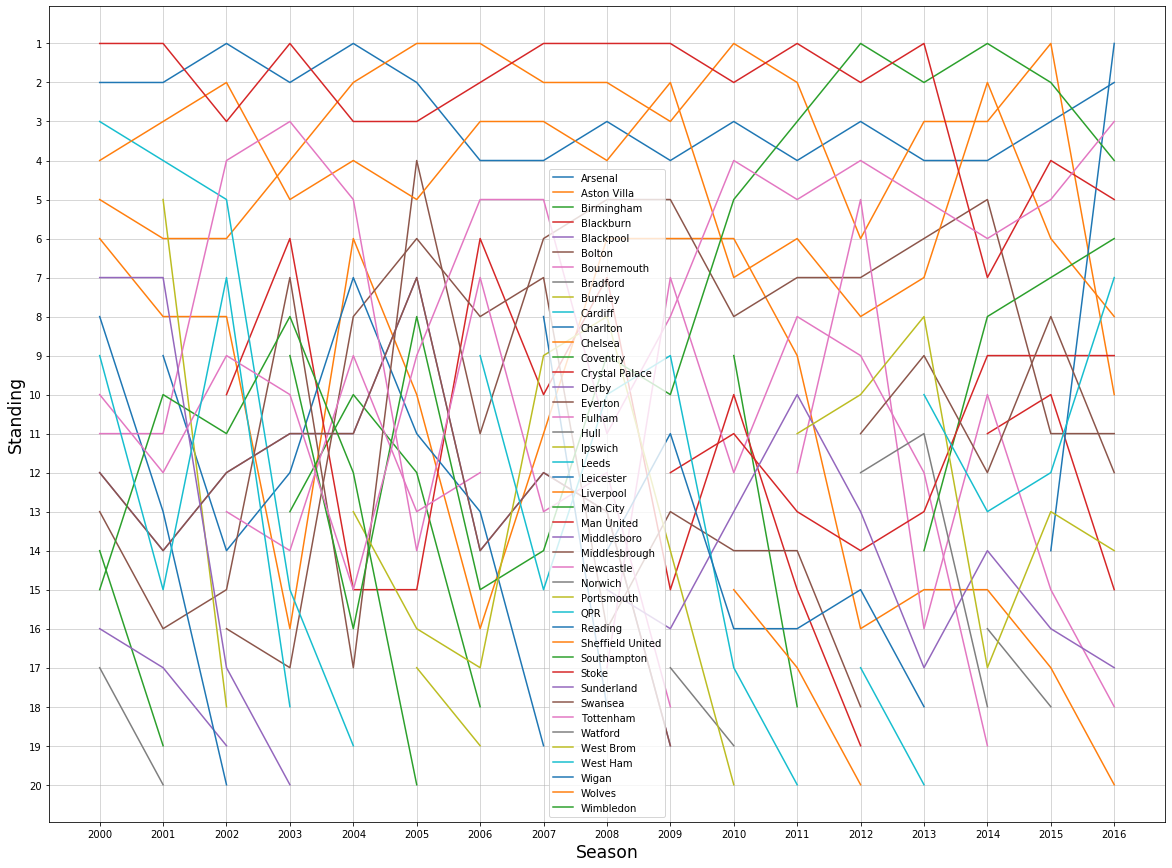

In [8]:
teams=list(eplTable['Team'])
years=list(eplTable.columns[1:])

fig=plt.figure(figsize=(20,15))
for row in eplTable.index:
    standings=list(eplTable.loc[row][1:])
    plt.plot(years,standings)

plt.gca().invert_yaxis()
plt.xlabel('Season', fontsize='xx-large')
plt.ylabel('Standing', fontsize='xx-large')
plt.yticks(np.arange(1, 21, step=1))
plt.grid(linestyle='-', linewidth=0.5)
plt.legend(teams, loc='best')
plt.savefig('EPLStandings.png', dpi = 300)

Too many teams. Let's filter it to only teams that ever finished in top 4 at least once.

In [9]:
sub_eplTable=eplTable.drop(['Team'],axis=1)

In [10]:
eplTable['Top4']=sub_eplTable[sub_eplTable.iloc[:,:]<=4].notna().sum(axis=1)>=1
#eplTable['Top4Count']=sub_eplTable[sub_eplTable.iloc[:,:]<=4].notna().sum(axis=1)
#you may un-comment above code to see how many times each teams finished in top 4
eplTableTop4=eplTable[eplTable['Top4']].drop(['Top4'],axis=1)
eplTableTop4

,Team,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,Arsenal,2.0,2.0,1.0,2.0,1.0,2.0,4.0,4.0,3.0,4.0,3.0,4.0,3.0,4.0,4.0,3.0,2.0
11,Chelsea,5.0,6.0,6.0,4.0,2.0,1.0,1.0,2.0,2.0,3.0,1.0,2.0,6.0,3.0,3.0,1.0,10.0
15,Everton,13.0,16.0,15.0,7.0,17.0,4.0,11.0,6.0,5.0,5.0,8.0,7.0,7.0,6.0,5.0,11.0,11.0
19,Leeds,3.0,4.0,5.0,15.0,19.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20,Leicester,8.0,13.0,20.0,NaN,18.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.0,1.0
21,Liverpool,4.0,3.0,2.0,5.0,4.0,5.0,3.0,3.0,4.0,2.0,7.0,6.0,8.0,7.0,2.0,6.0,8.0
22,Man City,NaN,18.0,NaN,9.0,16.0,8.0,15.0,14.0,9.0,10.0,5.0,3.0,1.0,2.0,1.0,2.0,4.0
23,Man United,1.0,1.0,3.0,1.0,3.0,3.0,2.0,1.0,1.0,1.0,2.0,1.0,2.0,1.0,7.0,4.0,5.0
26,Newcastle,11.0,11.0,4.0,3.0,5.0,14.0,7.0,13.0,12.0,18.0,NaN,12.0,5.0,16.0,10.0,15.0,18.0
36,Tottenham,10.0,12.0,9.0,10.0,15.0,9.0,5.0,5.0,11.0,8.0,4.0,5.0,4.0,5.0,6.0,5.0,3.0


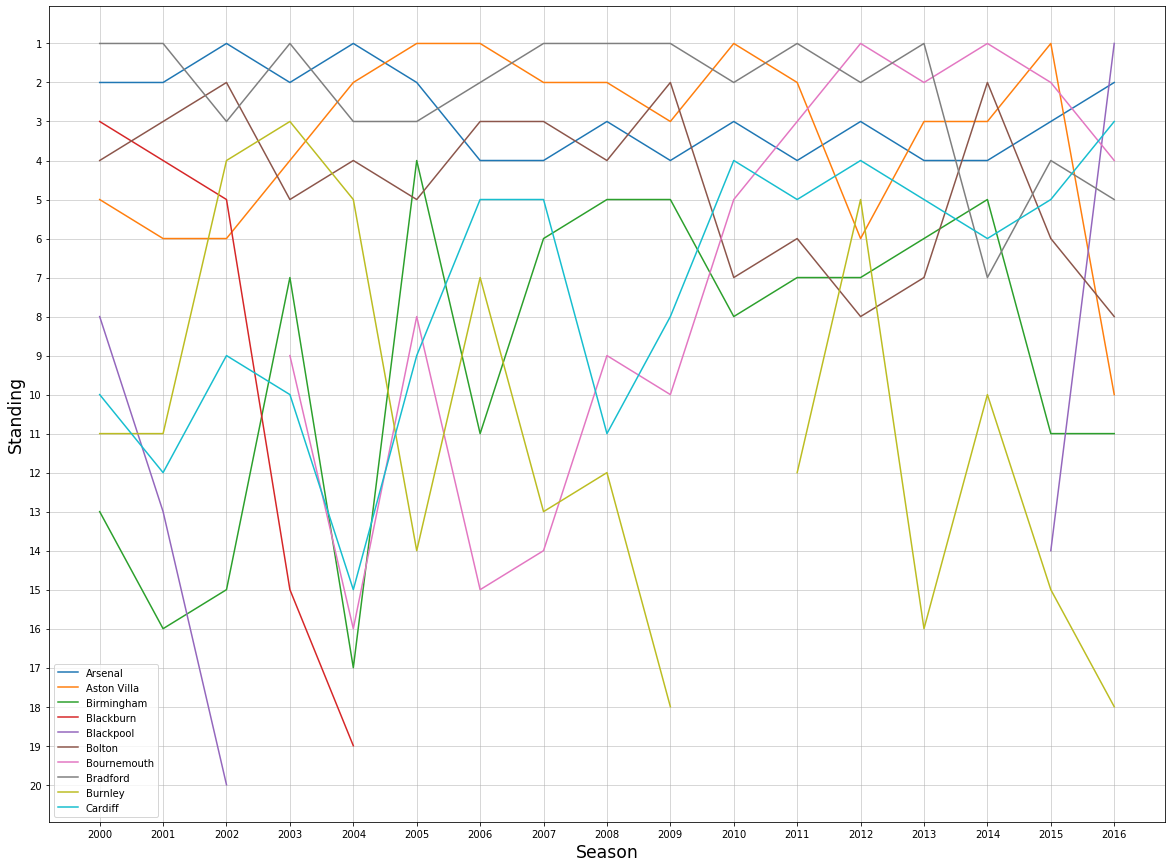

In [11]:
teamsTop4=list(eplTableTop4['Team'])
yearsTop4=list(eplTableTop4.columns[1:])

fig=plt.figure(figsize=(20,15))
for row in eplTableTop4.index:
    standingsTop4=list(eplTableTop4.loc[row][1:])
    plt.plot(yearsTop4,standingsTop4)

plt.gca().invert_yaxis()
plt.xlabel('Season', fontsize='xx-large')
plt.ylabel('Standing', fontsize='xx-large')
plt.yticks(np.arange(1, 21, step=1))
plt.grid(linestyle='-', linewidth=0.5)
plt.legend(teams, loc='best')
plt.savefig('EPLStandingsTop4.png', dpi = 300)